<a href="https://colab.research.google.com/github/morcellinus/Introduction_to_Deep_Learning/blob/main/LJM_Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 6 (Image Processing using Convolutional Neural Networks)
- CIFAR10 dataset (see https://www.cs.toronto.edu/~kriz/cifar.html for more info)
- 60K images: 50K train, 10K test
- 10 classes: 'plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
- Perform multi-class classification with evaluation accuracy on EACH class

**CONNECT TO GPU** before continuing, but just CPU is also fine, it might be a bit slow.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Hyper parameters
num_epochs = 4
batch_size = 4
learning_rate = 0.001

# Download and prepare dataset
# Transform them to tensors and normalise them
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
     ])

# 2.2 Download data
train_set = torchvision.datasets.CIFAR10("./", train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR10("./", train=False, download=True, transform=transform)

# 2.3 Use DataLoader to get batches and shuffle
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Q1. Why are there 3 values in each list of the Normalize() function? What do they represent?
print('There are 3 values in each list of the Normalize() since the data we have is about colored image. Color Image has three channels. First list represents the mean of the channel and the second represents the channel standard deviation.')

cuda


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified
There are 3 values in each list of the Normalize() since the data we have is about colored image. Color Image has three channels. First list represents the mean of the channel and the second represents the channel standard deviation.


### Inspect the Images

In [ ]:
# Access the first data sample in the train_set using next(iter())
batch = next(iter(train_loader))
print(f'Image values: \n{batch}')
print(f'Length: {len(batch)}')
print(f'Type: {type(batch)}')

# This means the data contains image-label pairs
# Unpack them
images, labels = batch
# Same as these two lines:
# image = batch[0]
# label = batch[1]


print(images.shape)
print(labels)

# Q2. What is the range of the values for the normalised image pixels?
print('\nThe range of the values for the normalised image pixels will be between -1 to 1')
# Q3. What does each index value of the shape of the image represent?
print('\nFirst Index: Batch Size \nSecond Index: Channels \nThird Index: Height of the image \nLast Index: Width of the image')
# Q4. What do the label values represent?
print('\nLabel values represent the labels(dependent variable of this dataset) of the first data sample in the train_set')

Image values: 
[tensor([[[[-0.8510, -0.8745, -0.7804,  ...,  0.9529,  0.9843,  0.9922],
          [-0.9451, -0.9059, -0.8588,  ...,  0.8118,  0.8980,  0.9843],
          [-0.8980, -0.6706, -0.6314,  ...,  0.7098,  0.7333,  0.8275],
          ...,
          [-0.6392, -0.6627, -0.6627,  ..., -0.6314, -0.6000, -0.5843],
          [-0.6627, -0.6235, -0.6000,  ..., -0.6549, -0.6235, -0.5843],
          [-0.6157, -0.6000, -0.6549,  ..., -0.6235, -0.6235, -0.6392]],

         [[-0.4353, -0.4667, -0.2784,  ...,  0.9922,  1.0000,  1.0000],
          [-0.6471, -0.6863, -0.5608,  ...,  0.9137,  0.9765,  1.0000],
          [-0.6314, -0.2863, -0.2784,  ...,  0.8431,  0.8745,  0.9373],
          ...,
          [-0.4510, -0.4824, -0.4902,  ..., -0.4431, -0.3961, -0.3804],
          [-0.4745, -0.4431, -0.4118,  ..., -0.4745, -0.4118, -0.3725],
          [-0.4275, -0.3961, -0.4353,  ..., -0.4510, -0.4275, -0.4196]],

         [[-0.2235, -0.2157, -0.0510,  ...,  1.0000,  1.0000,  1.0000],
          [-0.

### View some images
- Note that images have been normalised and may not look very clear

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


class labels: tensor([1, 5, 8, 1])


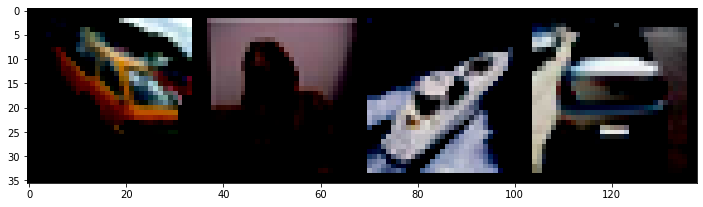

In [ ]:
# Create a grid 
plt.figure(figsize=(12,12))
grid = torchvision.utils.make_grid(tensor=images, nrow=4) # nrow = number of images displayed in each row

print(f"class labels: {labels}")

# Use grid.permute() to transpose the grid so that the axes meet the specifications required by 
# plt.imshow(), which are [height, width, channels]. PyTorch dimensions are [channels, height, width].
plt.imshow(grid.permute(1,2,0))

## CNN model

In [ ]:
class Test(nn.Module):
  def __init__(self):
    super().__init__()
    # in / out / filter
    self.conv1 = nn.Conv2d(3, 6, 5, padding = 1)
    self.relu = nn.ReLU()
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5) 
    # flatten 3D tensor to 1D tensor
    # 32 filter 28 pool 14 filter 10 pool 5
    self.fc1 = nn.Linear(16*5*5, 128) # Q8. Fill out the correct input dimensions 
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10) # final output matches num_classes

  def forward(self, x):
    # Conv + ReLU + pool
    print(f'Input shape: {x.shape}')
    out = self.conv1(x)
    print(f'After Conv1: {out.shape}')
    print(f'Padding: {self.conv1.padding}')
    out = self.pool(F.relu(out))
    print(f'After Pool1: {out.shape}')
    out = self.conv2(out)
    print(f'After Conv2: {out.shape}')
    out = self.pool(F.relu(out))
    print(f'After Pool2: {out.shape}')
    # Flatten it before fc1
    out = out.reshape(-1, 16*5*5) # Q8. Fill out the correct dimension after -1
    print(f'Before fc1: {out.shape}')
    out = self.fc1(out)
    out = self.relu(out)
    print(f'After fc1: {out.shape}')
    out = self.fc2(out)
    out = self.relu(out)
    print(f'After fc2: {out.shape}')
    out = self.fc3(out) # NO softmax as it will be included in CrossEntropyLoss
    print(f'After fc3: {out.shape}')
    return out


model = Test().to(device)
# Let's view the softmax output
probs = nn.Softmax(dim=1)


# Q5. What do the three arguments of the first convolutional layer, conv1 represent (3,6,5)? 
print('\nNumber of input channels (3 b/c it is color image), Number of output channels, and Filter size')
# Q6. Explain the arguments of the second convolutional layer, conv2 (6, 16, 5) 
print('\nNumber of input channels, (has to be 6 because the output channel of previous layer was 6), Number of output channels, and Filter size')
# Q7. Figure out the convolved image size after conv1
# Convolved image size = ((input_width - filter_size + 2 * padding) / stride) + 1
print('\n28')
# Q8. Figure out the input size to the first fcn layer and fill out the code above in init() and forward()
print('\nshould be 16*5*5')


Number of input channels (3 b/c it is color image), Number of output channels, and Filter size

Number of input channels, (has to be 6 because the output channel of previous layer was 6), Number of output channels, and Filter size

28

should be 16*5*5


### Run through a sample batch

In [ ]:
sample = next(iter(train_loader))

images, labels = sample

images = images.to(device)
labels = labels.to(device)

output = model(images)
print(f'Output shape: {output.shape}')
print(f'Softmax outputs:\n {probs(output)}')


# Q9. Explain the shape of the output after conv1
print('\nShape of the output after conv1 should be 28*28. This is because the original shape is 32*32 and the filter size is 5. This remains 2 untouched pixels for each edge of the image')
# Q10. What does the pooling do to the dimensions of the feature images here?
print('\nPooling halves the size of the output after conv1 layer')
# Q11. Add padding=1 to conv1 and rerun the last two code cells. How did padding affect the dimensions of the feature images?
print('\nPadding enlarged the size of convolved image from 28 by 28 to 30 by 30 since padding enables us to get the pixel from the four edges of the image. 30 is derived by the equation [{(32 - 5 + 2)/1}+1] = 30')
# Q12. What is represented by each list returned by Softmax outputs?
print('\nEach list returned by Softmax outputs shows the probability of each image to be classified as each label(y). For example, for the first list, the 8th value from the list is the largest. Therefore the first image in this batch should belong to 8th label.')

Input shape: torch.Size([4, 3, 32, 32])
After Conv1: torch.Size([4, 6, 30, 30])
Padding: (1, 1)
After Pool1: torch.Size([4, 6, 15, 15])
After Conv2: torch.Size([4, 16, 11, 11])
After Pool2: torch.Size([4, 16, 5, 5])
Before fc1: torch.Size([4, 400])
After fc1: torch.Size([4, 128])
After fc2: torch.Size([4, 64])
After fc3: torch.Size([4, 10])
Output shape: torch.Size([4, 10])
Softmax outputs:
 tensor([[0.0903, 0.1026, 0.1043, 0.0911, 0.1032, 0.0956, 0.1078, 0.1096, 0.1057,
         0.0899],
        [0.0909, 0.1021, 0.1047, 0.0899, 0.1037, 0.0958, 0.1078, 0.1097, 0.1059,
         0.0895],
        [0.0921, 0.1024, 0.1034, 0.0924, 0.1020, 0.0909, 0.1098, 0.1103, 0.1058,
         0.0910],
        [0.0903, 0.1022, 0.1054, 0.0903, 0.1023, 0.0950, 0.1090, 0.1089, 0.1064,
         0.0903]], device='cuda:0', grad_fn=<SoftmaxBackward>)

Shape of the output after conv1 should be 28*28. This is because the original shape is 32*32 and the filter size is 5. This remains 2 untouched pixels for each edg


### Let's Train!
- Now that we know and understand how CNNs work, let's put everything together for CIFAR-10 dataset
  - Download the data in batches and normalisation with shuffling
  - Build a model with 2 CNN layers containing ReLU and pooling
  - Passing the feature images to 3 fully connected layers (FCNs) also containing RELU activation
  - The final layer has 10 units to reprsent the number of output classes
  - Use Binary Cross Entropy Loss and SGD optimiser
  - Evaluate the model on the test data on EACH class

**IMPORTANT!** Fill out the missing code below before training 

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    #self.relu = nn.ReLU()
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5) 
    # flatten 3D tensor to 1D tensor
    self.fc1 = nn.Linear(16*5*5, 128) # TODO
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10) # final output matches num_classes

  def forward(self, x):
    # Conv + ReLU + pool
    out = self.pool(F.relu(self.conv1(x)))
    out = self.pool(F.relu(self.conv2(out)))
    # Flatten it before fc1
    out = out.reshape(-1, 16*5*5) # TODO
    out = F.relu(self.fc1(out))
    out = F.relu(self.fc2(out))
    out = self.fc3(out) # NO softmax as it will be included in CrossEntropyLoss
    return out


model = CNN().to(device)

# Q13. Use the Cross Entropy Loss for this task (UNCOMMENT & COMPLETE CODE BELOW)
criterion = nn.CrossEntropyLoss() # will apply softmax

# Q14. Use the Stochastic Gradient Descent (SGD) optimiser, this time ADD momentum=0.9 (UNCOMMENT & COMPLETE CODE BELOW)
opt = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum = 0.9)


## Training loop

In [ ]:
n_total_steps = len(train_set)
n_iterations = -(-n_total_steps // batch_size) # ceiling division

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    #print(images.shape) # [4,3,32,32] batch size, channels, img dim
    images = images.to(device)
    labels = labels.to(device)

    # Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # Backward pass and Optimise
    opt.zero_grad()
    loss.backward()
    opt.step()

    # Print
    if (i+1) % 1000 == 0:
      print(f'Epoch {epoch+1}/{num_epochs}, Iteration {i+1}/{n_iterations}, Loss={loss.item():.4f} ')



Epoch 1/4, Iteration 1000/12500, Loss=2.2901 
Epoch 1/4, Iteration 2000/12500, Loss=1.6949 
Epoch 1/4, Iteration 3000/12500, Loss=1.5985 
Epoch 1/4, Iteration 4000/12500, Loss=1.1184 
Epoch 1/4, Iteration 5000/12500, Loss=2.1383 
Epoch 1/4, Iteration 6000/12500, Loss=1.1556 
Epoch 1/4, Iteration 7000/12500, Loss=0.9093 
Epoch 1/4, Iteration 8000/12500, Loss=1.0887 
Epoch 1/4, Iteration 9000/12500, Loss=1.6856 
Epoch 1/4, Iteration 10000/12500, Loss=2.3143 
Epoch 1/4, Iteration 11000/12500, Loss=2.4090 
Epoch 1/4, Iteration 12000/12500, Loss=1.4585 
Epoch 2/4, Iteration 1000/12500, Loss=0.9875 
Epoch 2/4, Iteration 2000/12500, Loss=0.9975 
Epoch 2/4, Iteration 3000/12500, Loss=1.1968 
Epoch 2/4, Iteration 4000/12500, Loss=0.8513 
Epoch 2/4, Iteration 5000/12500, Loss=2.3219 
Epoch 2/4, Iteration 6000/12500, Loss=0.6026 
Epoch 2/4, Iteration 7000/12500, Loss=1.1051 
Epoch 2/4, Iteration 8000/12500, Loss=1.7121 
Epoch 2/4, Iteration 9000/12500, Loss=0.6904 
Epoch 2/4, Iteration 10000/1250

## Evaluation

In [ ]:
# Deactivate the autograd engine to reduce memory usage and speed up computations (backprop disabled).
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_class_correct = [0 for i in range(10)]
  n_class_samples = [0 for i in range(10)]


  # Loop through test set
  for images, labels in test_loader:
    # Put images on GPU
    images = images.to(device)
    labels = labels.to(device)
    # Run on trained model
    outputs = model(images) 

    # Get predictions
    # torch.max() returns actual probability value (ignored) and index or class label (selected)
    _, y_preds = torch.max(outputs, 1)
    n_samples += labels.size(0) # different to FFNN
    n_correct += (y_preds == labels).sum().item()

    # Keep track of each class
    for i in range(batch_size):
      label = labels[i]
      pred = y_preds[i]
      if (label == pred):
        n_class_correct[label] += 1
      n_class_samples[label] += 1

  # Print accuracy
  acc = 100.0 * n_correct / n_samples
  print(f'Test Accuracy of the WHOLE CNN = {acc} %')

  for i in range(len(classes)):
    acc = 100.0 * n_class_correct[i] / n_class_samples[i]
    print(f'Accuracy of {classes[i]}: {acc} %')


Test Accuracy of the WHOLE CNN = 60.18 %
Accuracy of plane: 66.4 %
Accuracy of car: 65.2 %
Accuracy of bird: 43.1 %
Accuracy of cat: 45.7 %
Accuracy of deer: 46.3 %
Accuracy of dog: 45.3 %
Accuracy of frog: 78.9 %
Accuracy of horse: 64.7 %
Accuracy of ship: 68.8 %
Accuracy of truck: 77.4 %


In [ ]:
# Q15. Why don't we need to reshape the input images when training and testing?
print('This is because the size of input image will shrink as going through convolution layers and pooling, and also before deriving output, we will flatten the image.')
# Q16. Try to improve the model performance, e.g. by increasing the epochs, changing batch size, adding convolutions, etc.

# Hyper parameters
num_epochs = 20
batch_size = 16
learning_rate = 0.001
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    #self.relu = nn.ReLU()
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5) 
    # flatten 3D tensor to 1D tensor
    self.fc1 = nn.Linear(16*5*5, 128) 
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10) 

  def forward(self, x):
    
    out = self.pool(F.relu(self.conv1(x)))
    out = self.pool(F.relu(self.conv2(out)))
    
    out = out.reshape(-1, 16*5*5) 
    out = F.relu(self.fc1(out))
    out = F.relu(self.fc2(out))
    out = self.fc3(out) 
    return out


model = CNN().to(device)

criterion = nn.CrossEntropyLoss() 

opt = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum = 0.9)

n_total_steps = len(train_set)
n_iterations = -(-n_total_steps // batch_size) 

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)
    loss = criterion(outputs, labels)

    opt.zero_grad()
    loss.backward()
    opt.step()

    if (i+1) % 300 == 0:
      print(f'Epoch {epoch+1}/{num_epochs}, Iteration {i+1}/{n_iterations}, Loss={loss.item():.4f} ')

with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_class_correct = [0 for i in range(10)]
  n_class_samples = [0 for i in range(10)]


  # Loop through test set
  for images, labels in test_loader:
    # Put images on GPU
    images = images.to(device)
    labels = labels.to(device)
    # Run on trained model
    outputs = model(images) 

    # Get predictions
    # torch.max() returns actual probability value (ignored) and index or class label (selected)
    _, y_preds = torch.max(outputs, 1)
    n_samples += labels.size(0) # different to FFNN
    n_correct += (y_preds == labels).sum().item()

    # Keep track of each class
    for i in range(batch_size):
      label = labels[i]
      pred = y_preds[i]
      if (label == pred):
        n_class_correct[label] += 1
      n_class_samples[label] += 1

  # Print accuracy
  acc = 100.0 * n_correct / n_samples
  print(f'Test Accuracy of the WHOLE CNN = {acc} %')

  for i in range(len(classes)):
    acc = 100.0 * n_class_correct[i] / n_class_samples[i]
    print(f'Accuracy of {classes[i]}: {acc} %')

This is because the size of input image will shrink as going through convolution layers and pooling, and also before deriving output, we will flatten the image.
Epoch 1/20, Iteration 300/3125, Loss=2.2945 
Epoch 1/20, Iteration 600/3125, Loss=2.2903 
Epoch 1/20, Iteration 900/3125, Loss=2.2685 
Epoch 1/20, Iteration 1200/3125, Loss=2.1937 
Epoch 1/20, Iteration 1500/3125, Loss=2.2482 
Epoch 1/20, Iteration 1800/3125, Loss=1.9059 
Epoch 1/20, Iteration 2100/3125, Loss=1.9809 
Epoch 1/20, Iteration 2400/3125, Loss=1.6593 
Epoch 1/20, Iteration 2700/3125, Loss=1.8339 
Epoch 1/20, Iteration 3000/3125, Loss=1.7281 
Epoch 2/20, Iteration 300/3125, Loss=1.6154 
Epoch 2/20, Iteration 600/3125, Loss=1.8748 
Epoch 2/20, Iteration 900/3125, Loss=1.3542 
Epoch 2/20, Iteration 1200/3125, Loss=1.4577 
Epoch 2/20, Iteration 1500/3125, Loss=1.5003 
Epoch 2/20, Iteration 1800/3125, Loss=1.4770 
Epoch 2/20, Iteration 2100/3125, Loss=1.5870 
Epoch 2/20, Iteration 2400/3125, Loss=1.5934 
Epoch 2/20, Itera